# Task 5 - Build Linear Regression Model

## Imports and Loading 

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## Explore Data with EDA

In [382]:
df = pd.read_csv('Dataset/2017_Taxi_Trip_Data.csv')
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [383]:
df.shape

(22699, 18)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [385]:
df.isnull().sum().sum()

0

In [386]:
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [387]:
df['tpep_pickup_datetime'].head()

0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object

In [388]:
print(df['tpep_pickup_datetime'].dtype)
print(df['tpep_dropoff_datetime'].dtype)

object
object


In [389]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [390]:
print(df['tpep_pickup_datetime'].dtype)
print(df['tpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


In [391]:
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,8.000000
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,21.983333
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,12.116667
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,20.433333


## Visualization

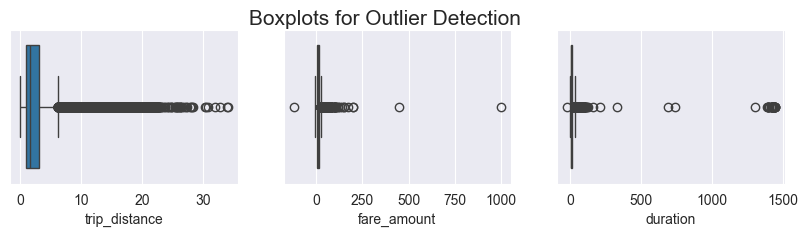

In [392]:
fig,axes = plt.subplots(1,3,figsize=(10,2))
fig.suptitle('Boxplots for Outlier Detection',fontsize=15)
sns.boxplot(ax=axes[0],x=df['trip_distance'])
sns.boxplot(ax=axes[1],x=df['fare_amount'])
sns.boxplot(ax=axes[2],x=df['duration'])
plt.show()

## Imputations

In [393]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [394]:
sum(df['trip_distance']==0)

148

In [395]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [396]:
df['fare_amount'] = np.where(df['fare_amount']<0,0,df['fare_amount'])

In [397]:
df['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [398]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1
max_value = q3 + 7*iqr

In [399]:
len(df[df['fare_amount']>max_value])

50

In [400]:
df['fare_amount'] = np.where(df['fare_amount']>max_value,max_value,df['fare_amount'])
df['fare_amount'].describe()

count    22699.000000
mean        12.921383
std         10.659110
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         70.500000
Name: fare_amount, dtype: float64

In [401]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [402]:
df['duration'] = np.where(df['duration']<0,0,df['duration'])
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
max_value = q3 + 7*iqr
df['duration'] = np.where(df['duration']>max_value,max_value,df['duration'])
df['duration'].describe()

count    22699.000000
mean        14.493595
std         12.166165
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max        100.516667
Name: duration, dtype: float64

## Feature Engineering

In [403]:
df['pickup_dropoff'] = df['PULocationID'].astype('str')+' '+df['DOLocationID'].astype('str')

In [404]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,8.000000,161 236
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333,79 241
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,21.983333,237 114
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,12.116667,234 249
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,20.433333,239 237


In [405]:
grouped = df.groupby(by='pickup_dropoff')['trip_distance'].mean().round(2).to_dict()
df['mean_distance'] = df['pickup_dropoff'].copy()
df['mean_distance'] = df['mean_distance'].map(grouped)

In [406]:
grouped2 = df.groupby('pickup_dropoff')['duration'].mean().round(2).to_dict()
df['mean_duration'] = df['pickup_dropoff'].copy()
df['mean_duration'] = df['mean_duration'].map(grouped2)

In [407]:
df['Day'] = df['tpep_pickup_datetime'].dt.day_name().astype('str')
df['Month'] = df['tpep_pickup_datetime'].dt.month_name().astype('str')
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.00,0.3,16.56,14.066667,100 231,3.52,22.85,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.00,0.3,20.80,26.500000,186 43,3.11,24.47,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.00,0.3,8.75,7.200000,262 236,0.88,7.25,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.00,0.3,27.69,30.250000,188 97,3.70,30.25,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.00,0.3,17.80,16.716667,4 112,4.44,14.62,Saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.00,0.3,5.80,3.266667,48 186,1.10,8.59,Friday,February
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,14.64,5.76,0.3,73.20,40.800000,132 164,18.76,59.56,Sunday,August
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.00,0.3,5.30,4.133333,107 234,0.68,6.61,Monday,September
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,1.70,0.00,0.3,13.00,11.933333,68 144,2.08,16.65,Saturday,July


In [408]:
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

In [409]:
cond1 = df['Day']=='Sunday'
cond2 = df['Day']=='Saturday'
df['rush_hour'] = np.where(cond1 | cond2,0,df['rush_hour'])

In [410]:
cond3 = df['rush_hour'].between(6,10,inclusive='left')
cond4 = df['rush_hour'].between(16,20,inclusive='left')
df['rush_hour'] = np.where(cond3 | cond4,1,0)
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,Day,Month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.00,0.3,16.56,14.066667,100 231,3.52,22.85,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.00,0.3,20.80,26.500000,186 43,3.11,24.47,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.00,0.3,8.75,7.200000,262 236,0.88,7.25,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.00,0.3,27.69,30.250000,188 97,3.70,30.25,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.3,17.80,16.716667,4 112,4.44,14.62,Saturday,April,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.3,5.80,3.266667,48 186,1.10,8.59,Friday,February,1
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,5.76,0.3,73.20,40.800000,132 164,18.76,59.56,Sunday,August,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.3,5.30,4.133333,107 234,0.68,6.61,Monday,September,0
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,0.00,0.3,13.00,11.933333,68 144,2.08,16.65,Saturday,July,0


In [411]:
df['rush_hour'].value_counts()

rush_hour
0    15963
1     6736
Name: count, dtype: int64

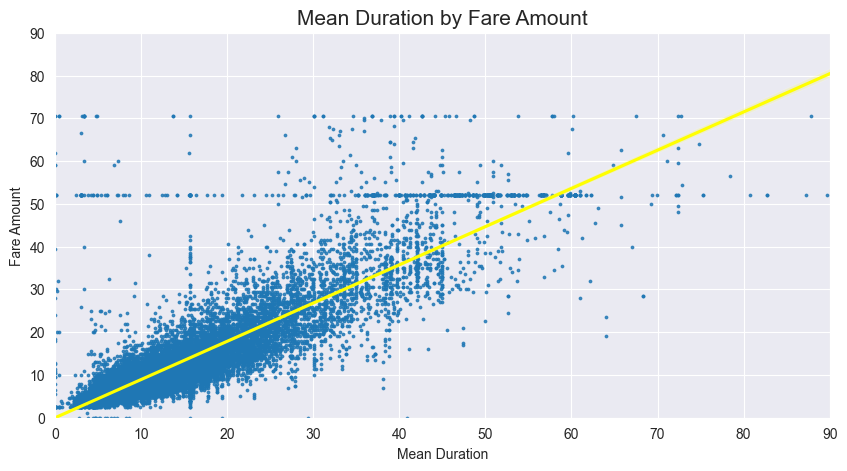

In [412]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['mean_duration'],y=df['fare_amount'],scatter_kws={'alpha':0.8,'s':3},line_kws={'color':'yellow'})
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.title("Mean Duration by Fare Amount",fontsize=15)
plt.show()

In [413]:
df[df['fare_amount']>50]['fare_amount'].value_counts().head(5)

fare_amount
52.0    514
70.5     53
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

## Isolate Modelling Variables

In [415]:
df2 = df[['VendorID','passenger_count','fare_amount','mean_distance','mean_duration','rush_hour']].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


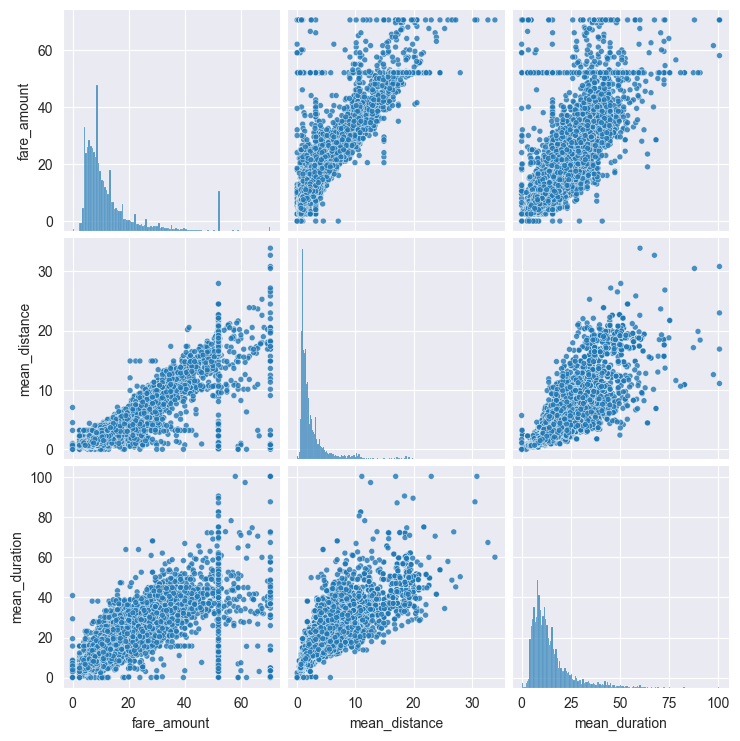

In [416]:
sns.pairplot(df2[['fare_amount','mean_distance','mean_duration']],plot_kws={'alpha':0.8,'size':10})

## Identify Correlations

In [417]:
df2.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001245,0.004737,0.002062,-0.002874
passenger_count,0.266463,1.000000,0.014981,0.013433,0.015817,-0.022035
fare_amount,0.001245,0.014981,1.000000,0.907917,0.852108,-0.019940
mean_distance,0.004737,0.013433,0.907917,1.000000,0.872414,-0.039731
mean_duration,0.002062,0.015817,0.852108,0.872414,1.000000,-0.021255
rush_hour,-0.002874,-0.022035,-0.019940,-0.039731,-0.021255,1.000000


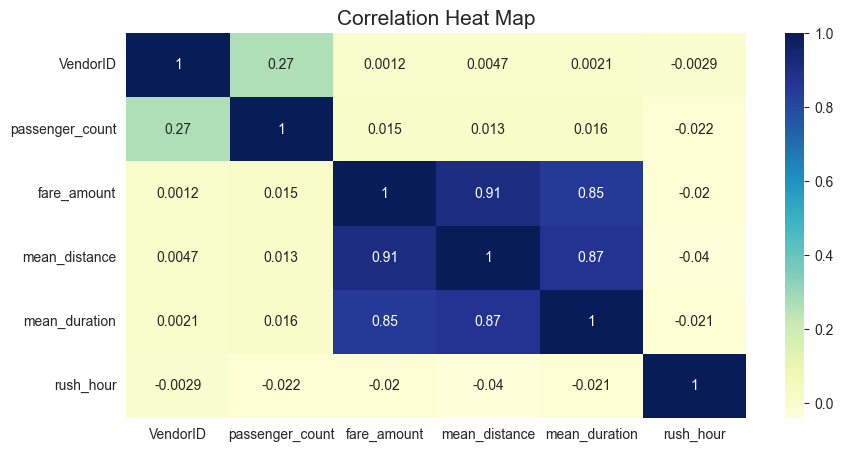

In [418]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True,cmap='YlGnBu')
plt.title("Correlation Heat Map",fontsize=15)
plt.show()

## Pre-Process Data

In [419]:
Y = df2[['fare_amount']]
X = df2.drop(columns=['fare_amount'])

In [420]:
X['VendorID'] = X['VendorID'].astype('str')
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.52,22.85,0
1,1,1,3.11,24.47,0
2,1,1,0.88,7.25,1
3,2,1,3.70,30.25,0
4,2,1,4.44,14.62,0


In [421]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.8931955 ,  3.39065627,  0.17049666,  0.82256051, -0.64959666],
       [-1.11957573, -0.4997803 ,  0.05529393,  0.98202477, -0.64959666],
       [-1.11957573, -0.4997803 , -0.57129655, -0.71302125,  1.53941679],
       ...,
       [ 0.8931955 , -0.4997803 , -0.627493  , -0.77601947, -0.64959666],
       [ 0.8931955 , -0.4997803 , -0.23411782,  0.2122652 , -0.64959666],
       [-1.11957573, -0.4997803 , -0.40270718, -0.50040223, -0.64959666]])

In [422]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled,Y,test_size=0.8,random_state=36)
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

###### Training Data

In [423]:
r_sq = lin_reg.score(xtrain,ytrain)
y_pred_train = lin_reg.predict(xtrain)
print('Coefficient of Determination (R²): ',r_sq)
print('Mean Absolute Error (MAE): ',met.mean_absolute_error(ytrain,y_pred_train))
print('Mean Squared Error (MSE): ',met.mean_squared_error(ytrain,y_pred_train))
print('Root Mean Squared Error (RMSE): ',np.sqrt(met.mean_squared_error(ytrain,y_pred_train)))

Coefficient of Determination (R²):  0.8445285502865842
Mean Absolute Error (MAE):  2.1685244138610127
Mean Squared Error (MSE):  18.230285524588698
Root Mean Squared Error (RMSE):  4.269693844362696


###### Test Data

In [424]:
r_sq = lin_reg.score(xtest,ytest)
y_pred_test= lin_reg.predict(xtest)
print('Coefficient of Determination (R²): ',r_sq)
print('Mean Absolute Error (MAE): ',met.mean_absolute_error(ytest,y_pred_test))
print('Mean Squared Error (MSE): ',met.mean_squared_error(ytest,y_pred_test))
print('Root Mean Squared Error (RMSE): ',np.sqrt(met.mean_squared_error(ytest,y_pred_test)))

Coefficient of Determination (R²):  0.8381615508247777
Mean Absolute Error (MAE):  2.1887240218596364
Mean Squared Error (MSE):  18.239034731089664
Root Mean Squared Error (RMSE):  4.270718292171665


## Result

In [425]:
res = pd.DataFrame(data={'actual':ytest['fare_amount'],'predicted':y_pred_test.ravel()})
res['residual'] = res['actual'] - res['predicted']
res

,actual,predicted,residual
21746,10.0,10.523115,-0.523115
7870,7.0,8.373928,-1.373928
10262,18.5,19.204544,-0.704544
14007,12.0,13.060724,-1.060724
12668,27.0,25.182471,1.817529
...,...,...,...
10030,6.5,7.276474,-0.776474
9303,7.5,8.944342,-1.444342
20917,4.5,7.796792,-3.296792
7614,9.5,9.229183,0.270817


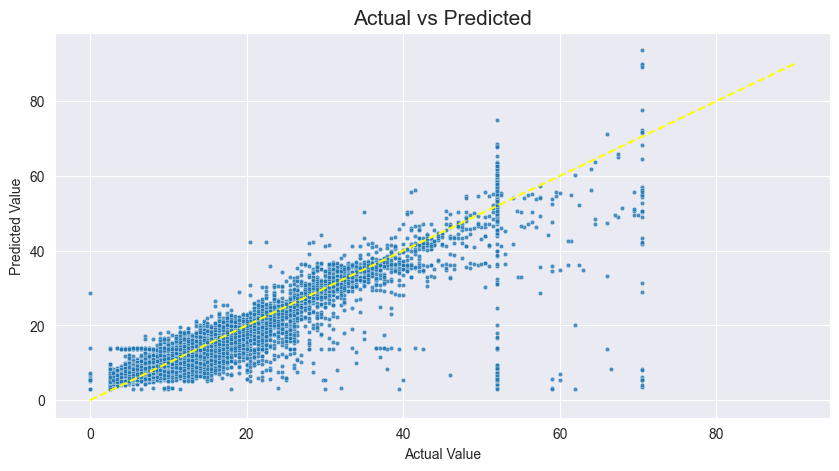

In [426]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='actual',y='predicted',data=res,s=10,alpha=0.8)
plt.plot([0,90],[0,90],color='yellow',linestyle='--',linewidth=1.5)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted',fontsize=15)
plt.show()

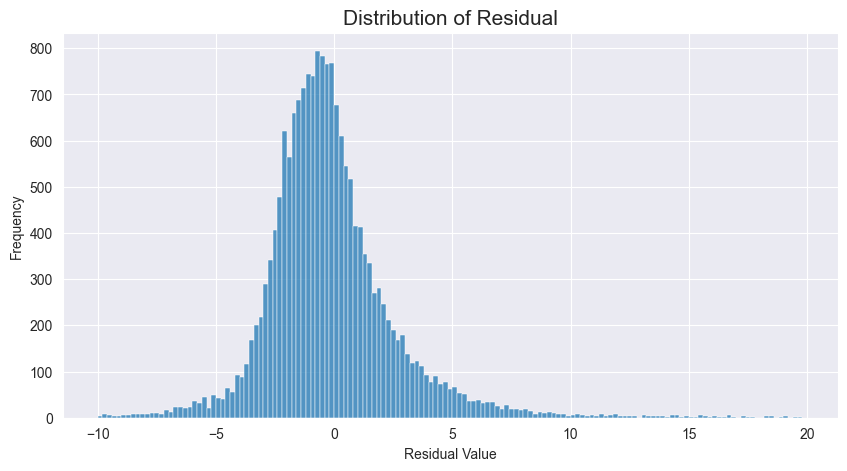

In [427]:
plt.figure(figsize=(10,5))
sns.histplot(res['residual'],bins=np.arange(-10,20,0.2))
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residual',fontsize=15)
plt.show()

In [428]:
res['residual'].mean()

0.06176382339574059

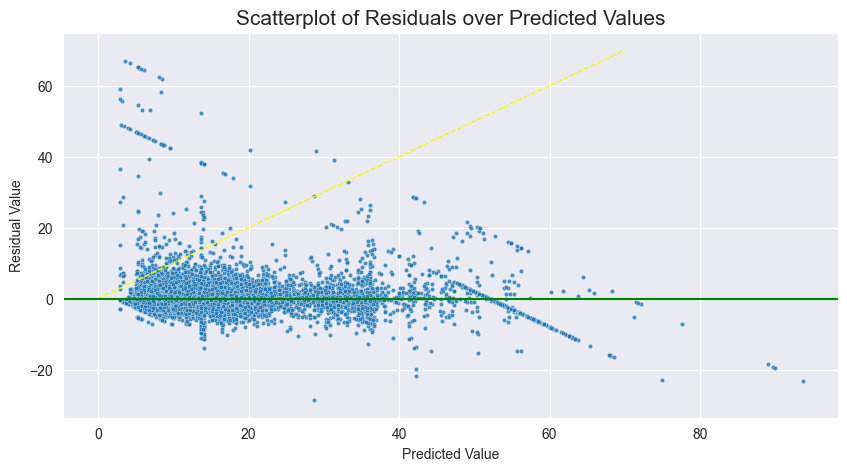

In [429]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='predicted',y='residual',data=res,s=10,alpha=0.8)
plt.plot([0,70],[0,70],color='yellow',linestyle='--',linewidth=1)
plt.axhline(0,c='green')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
plt.title('Scatterplot of Residuals over Predicted Values',fontsize=15)
plt.show()

In [430]:
coeff = pd.DataFrame(lin_reg.coef_,columns=X.columns)
coeff

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.026181,-0.008472,7.462409,2.639365,0.154424


In [431]:
y_pred_full = lin_reg.predict(X_scaled)
final_pred = df[['RatecodeID']].copy()
final_pred['Prediction'] = y_pred_full

In [432]:
cond5 = df['RatecodeID']==2
final_pred['Prediction'] = np.where(cond5,52,final_pred['Prediction'])
final_pred

,RatecodeID,Prediction
0,1,16.162901
1,1,15.809750
2,1,6.998067
3,1,18.495842
4,1,15.986722
...,...,...
22694,1,7.741623
22695,2,52.000000
22696,1,6.021697
22697,1,11.565668


In [433]:
y_preds = final_pred['Prediction']
print('Coefficient of Determination (R²): ',met.r2_score(Y,y_preds))
print('Mean Absolute Error (MAE): ',met.mean_absolute_error(Y, y_preds))
print('Mean Squared Error (MSE): ',met.mean_squared_error(Y, y_preds))
print('Root Mean Squared Error (RMSE): ',np.sqrt(met.mean_squared_error(Y, y_preds)))

Coefficient of Determination (R²):  0.8850319317094605
Mean Absolute Error (MAE):  1.9919587854902359
Mean Squared Error (MSE):  13.06170973126138
Root Mean Squared Error (RMSE):  3.6140987439832606


In [434]:
NYC_TLC_pred = df[['mean_duration','mean_distance']].copy()
NYC_TLC_pred['predicted_fare'] = y_preds
NYC_TLC_pred

,mean_duration,mean_distance,predicted_fare
0,22.85,3.52,16.162901
1,24.47,3.11,15.809750
2,7.25,0.88,6.998067
3,30.25,3.70,18.495842
4,14.62,4.44,15.986722
...,...,...,...
22694,8.59,1.10,7.741623
22695,59.56,18.76,52.000000
22696,6.61,0.68,6.021697
22697,16.65,2.08,11.565668


In [435]:
NYC_TLC_pred.to_csv('Models/NYC_TLC_pred.csv',index=True)